<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Your answer here`

Для того чтобы результаты у меня и у проверяющего, при новых запусках, были одинаковые, то есть благодаря сидам закрепляются различные рандомные результаты, например, деление на тестовую и тренировочную выборки 

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [5]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [7]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [8]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

Пропуски есть в последних 5 колонках у тестовой и тренировочной выборках

In [9]:
df_test[df_test.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
200,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
235,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
238,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
253,Tata Safari Storme EX,2015,503000,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
269,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,254.79 bhp,620Nm@ 1600-2400rpm,5.0
936,BMW X4 M Sport X xDrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
949,Toyota Camry 2.5 Hybrid,2016,2000000,68089,Petrol,Trustmark Dealer,Automatic,First Owner,19.16 kmpl,2494 CC,157.7 bhp,213Nm@ 4500rpm,5.0
971,Maruti Ertiga SHVS ZDI Plus,2017,750000,50000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


In [10]:
df_train[df_train.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Дубликаты есть и их много

**Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?**

- Можно посмотреть, какими данными заполнены колонки (их типы, формат значений), оценить адекватность, на этом этапе можно найти явные ошибки 
- Нельзя сделать вывод о том, как распределены данные, есть ли пропуски или дубликаты, не получится найти закономерности

**Достаточно ли метода duplicated для анализа дубликатов? Почему?**

Этот метод может помочь найти только явные дубликаты, то есть те, в которых значения (строки или выбранные столбцы) точь-в-точь повторяются. Также существуют неявные дубликаты, например, когда одно и то же слово написано с ошибкой, или вместо точки стоит запятая, или даже когда между словами не один, а два пробела, то этот метод уже не увидит дубль. Поэтому для полноценного анализа на дубли потребуется больше усилий, чем просто метод duplicated! 

Дашборд

In [11]:
!pip install ydata-profiling

  Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl.metadata (22 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached typeguard-4.4.4-py3-none-any.whl.metadata (3.3 kB)
  Using cached ImageHash-4.3.2-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached dacite-1.9.2-py3-none-any.whl.metadata (17 kB)
  Using cached puremagic-1.30-py3-none-any.whl.metadata (5.8 kB)
Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl (398 kB)
Using cached ImageHash-4.3.2-py2.py3-none-any.whl (296 kB)
Using cached dacite-1.9.2-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 5.0 MB/s  0:00:01 eta 0:00:01
Using cached multimethod-1.12-py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 6.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 5.6 

In [12]:
from ydata_profiling import ProfileReport

/opt/anaconda3/envs/streamlit310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
profile_test = ProfileReport(df_test, title="Profiling Report of test data", explorative=True)
profile_test

ModuleNotFoundError: No module named 'ipywidgets'

In [14]:
profile_train = ProfileReport(df_train, title="Profiling Report of train data", explorative=True)
profile_train

ModuleNotFoundError: No module named 'ipywidgets'

Очень крутая штука, не знала, что такое есть! Обязательно буду использовать!

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Пропуски у нас в колонках: 
- mileage         
- engine           
- max_power       
- torque          
- seats      

Но ведь только seat числовой, остальные категориальные - у них нет медианы, у них есть мода, но я не уверена, что характеристики машины можно по ней распределять, каждая машина со своими характеристиками 

In [15]:
df_train[['mileage', 'engine', 'max_power', 'torque', 'seats']]

,mileage,engine,max_power,torque,seats
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...
6994,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [16]:
train_medians = df_train.median(numeric_only=True)
df_train = df_train.fillna(train_medians)
df_test = df_test.fillna(train_medians)

print("Количество пропущенных ЧИСЛОВЫХ значений в TRAIN:", df_train.select_dtypes(include='number').isna().sum().sum())
print("Количество пропущенных ЧИСЛОВЫХ значений в TEST: ", df_test.select_dtypes(include='number').isna().sum().sum())

Количество пропущенных ЧИСЛОВЫХ значений в TRAIN: 0
Количество пропущенных ЧИСЛОВЫХ значений в TEST:  0


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [17]:
train_no_aim_col = df_train.columns.drop('selling_price')
duplicates = df_train[df_train.duplicated(subset=train_no_aim_col, keep=False)]
print("Количество дублей без целевой:", duplicates.shape[0])


Количество дублей без целевой: 1799


In [18]:
duplicates.sort_values(by=train_no_aim_col.tolist()).head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


In [19]:
df_train = df_train.drop_duplicates(subset=train_no_aim_col, keep='first')
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [20]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [21]:
# Функция очистки признаков (подглядела у Чата использование ругулярок, чтобы отделить буквы от слов)
def clean_dataset(df):
    # отделяем числа от букв
    df["mileage"] = df["mileage"].str.extract(r'(\d+\.?\d*)').astype(float)
    df["engine"] = df["engine"].str.extract(r'(\d+\.?\d*)').astype(float)
    df["max_power"] = df["max_power"].str.extract(r'(\d+\.?\d*)').astype(float)
    # колонку torque удаляем
    df.drop(columns=["torque"], inplace=True)

    return df

df_train = clean_dataset(df_train.copy())
df_test  = clean_dataset(df_test.copy())

print(df_train.dtypes)
print(df_test.dtypes)


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

А мы разве убирали пропуски? Мы же только отделяли числа до этого... Ну давайте также медианой заполню пропуски

In [22]:
print("Количество пропущенных ЧИСЛОВЫХ значений в TRAIN до заполнения медианой:", df_train.select_dtypes(include='number').isna().sum().sum())
print("Количество пропущенных ЧИСЛОВЫХ значений в TEST до заполнения медианой: ", df_test.select_dtypes(include='number').isna().sum().sum())
train_medians = df_train.median(numeric_only=True)
df_train = df_train.fillna(train_medians)
df_test = df_test.fillna(train_medians)
print("Количество пропущенных ЧИСЛОВЫХ значений в TRAIN после:", df_train.select_dtypes(include='number').isna().sum().sum())
print("Количество пропущенных ЧИСЛОВЫХ значений в TEST после: ", df_test.select_dtypes(include='number').isna().sum().sum())

Количество пропущенных ЧИСЛОВЫХ значений в TRAIN до заполнения медианой: 556
Количество пропущенных ЧИСЛОВЫХ значений в TEST до заполнения медианой:  57
Количество пропущенных ЧИСЛОВЫХ значений в TRAIN после: 0
Количество пропущенных ЧИСЛОВЫХ значений в TEST после:  0


In [23]:
df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"]  = df_train["seats"].astype(int)

df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"]  = df_train["seats"].astype(int)

print(df_train.dtypes)
print(df_train.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [24]:
# числовые колонки
num_col = df_train.select_dtypes(include='number').columns

print("Статистики числовых столбцов TRAIN:")
display(df_train[num_col].describe())

print("\nСтатистики числовых столбцов TEST:")
display(df_test[num_col].describe())

Статистики числовых столбцов TRAIN:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.906371,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.640418,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000



Статистики числовых столбцов TEST:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.33881,1454.87600,90.841670,5.403000
std,4.012149,7.585539e+05,48486.218662,3.95175,521.99574,34.893389,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.00000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.55000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.37000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.30000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.26000,3604.00000,280.000000,9.000000


- можно увидеть, что нет пропусков, везде count 5840 для треина и 1000 для теста, также можно отметить, что соотношение выборок почти 80 на 20, база
-  можно отметить, что у таргета в тесте в 6 раз больше максимлаьное значение ,чем у треина, это мне кажется, что немножко плохо, у проезжанных километров у треина минимум 1, а у теста 1303, будто бы у теста немножко больше экстремальных значений
- в трэине машины с 1983 года, но в тесте только с 1995

In [25]:
# категориальные колонки
cat_col = df_train.select_dtypes(include='object').columns

print("Статистики категориальных столбцов TRAIN:")
display(df_train[cat_col].describe())

print("\nСтатистики категориальных столбцов TEST:")
display(df_test[cat_col].describe())

Статистики категориальных столбцов TRAIN:


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603



Статистики категориальных столбцов TEST:


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


- тут тоже видно, что пропусков нет и количество равно везде 
- видно, что у треина больше уникальных названий машин, почти в три раза больше, дальше уникальные переменные равны у треина и теста
- мода везде кроме имени совпадает у треина и теста, пропорции примерно одинаковые кроме имени

In [26]:
df_train.shape
#удалили же один столбец

(5840, 12)

In [27]:
# закомменчу так как ошибка появляется
# assert df_train.shape == (5840, 13)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

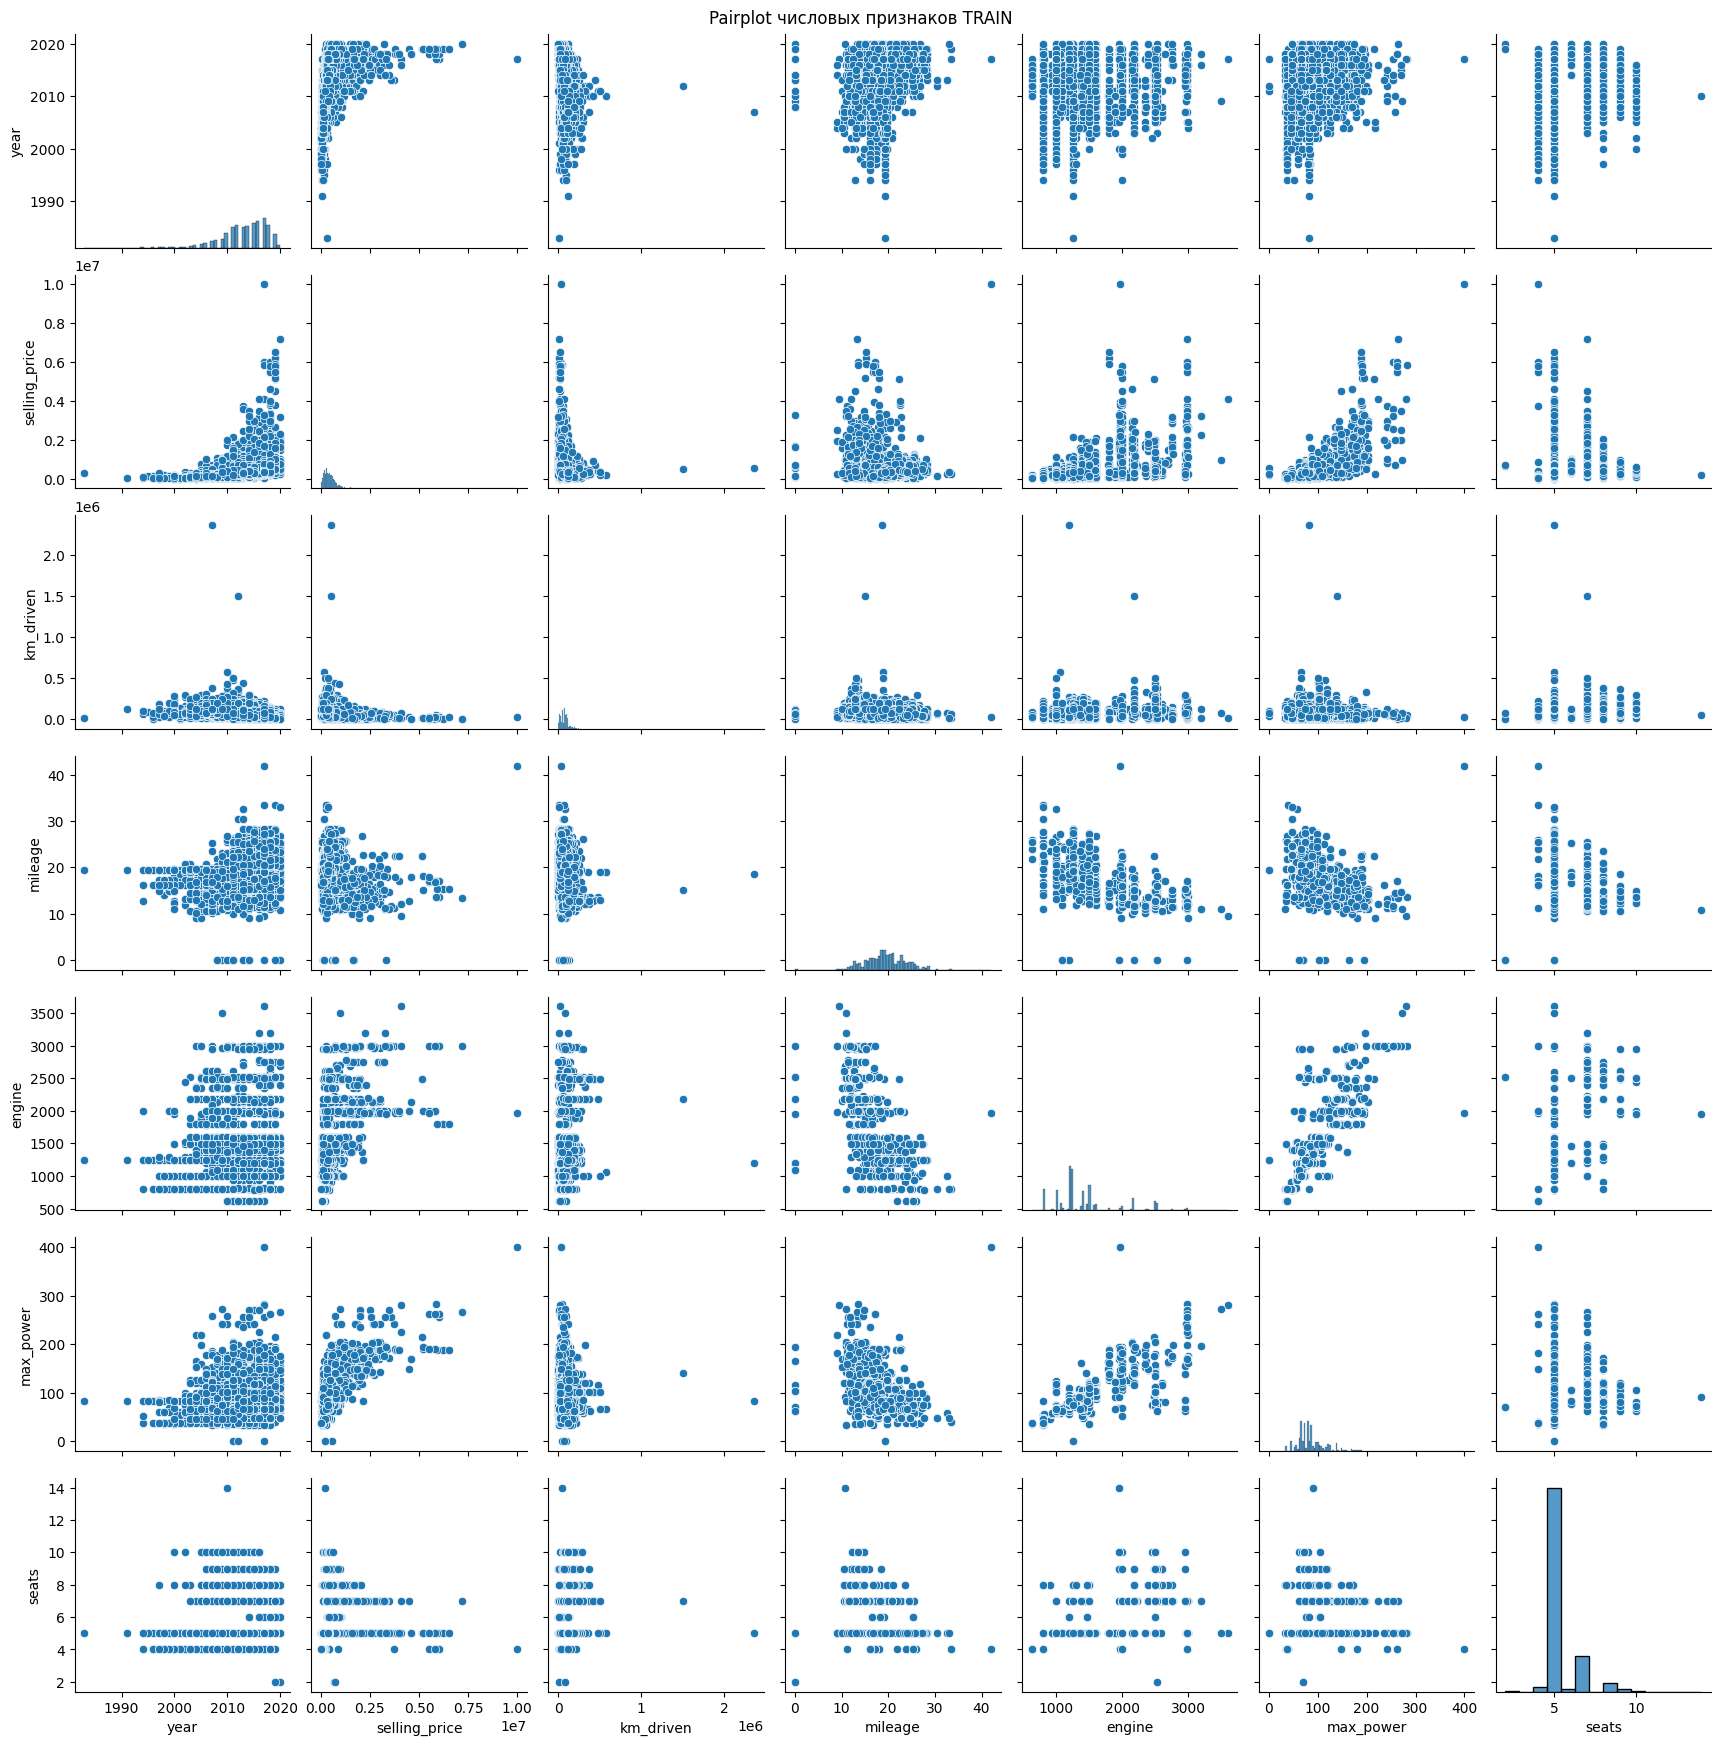

In [28]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#числовые признаки из прошлого задания
num_col = df_train.select_dtypes(include='number').columns

sns.pairplot(df_train[num_col])
plt.suptitle("Pairplot числовых признаков TRAIN", y=1)
plt.show()


По целевой переменной: 
- мне кажется, что чем больше цена, тем больше максимальная сила, прослеживается позитивная тенденция
- также кажется, что чем больше год выпуска, тем тоже больше цена
- чем меньше проезжено километров, тем больше цена (отрицательная линейная тенденция)
- будто бы у машин с большим количеством мест цена меньше, чем у 4-6 местных

Гипотеза о корреляции признаков: 
- мне кажется, можно предположить, что максимальная сила и двигатель связаны, возможно, из второго выходит первое (чем мощнее машина, тем лучше у нее двигатель), по графику тоже положительная зависимость видна (не сильно сильная в машинах)

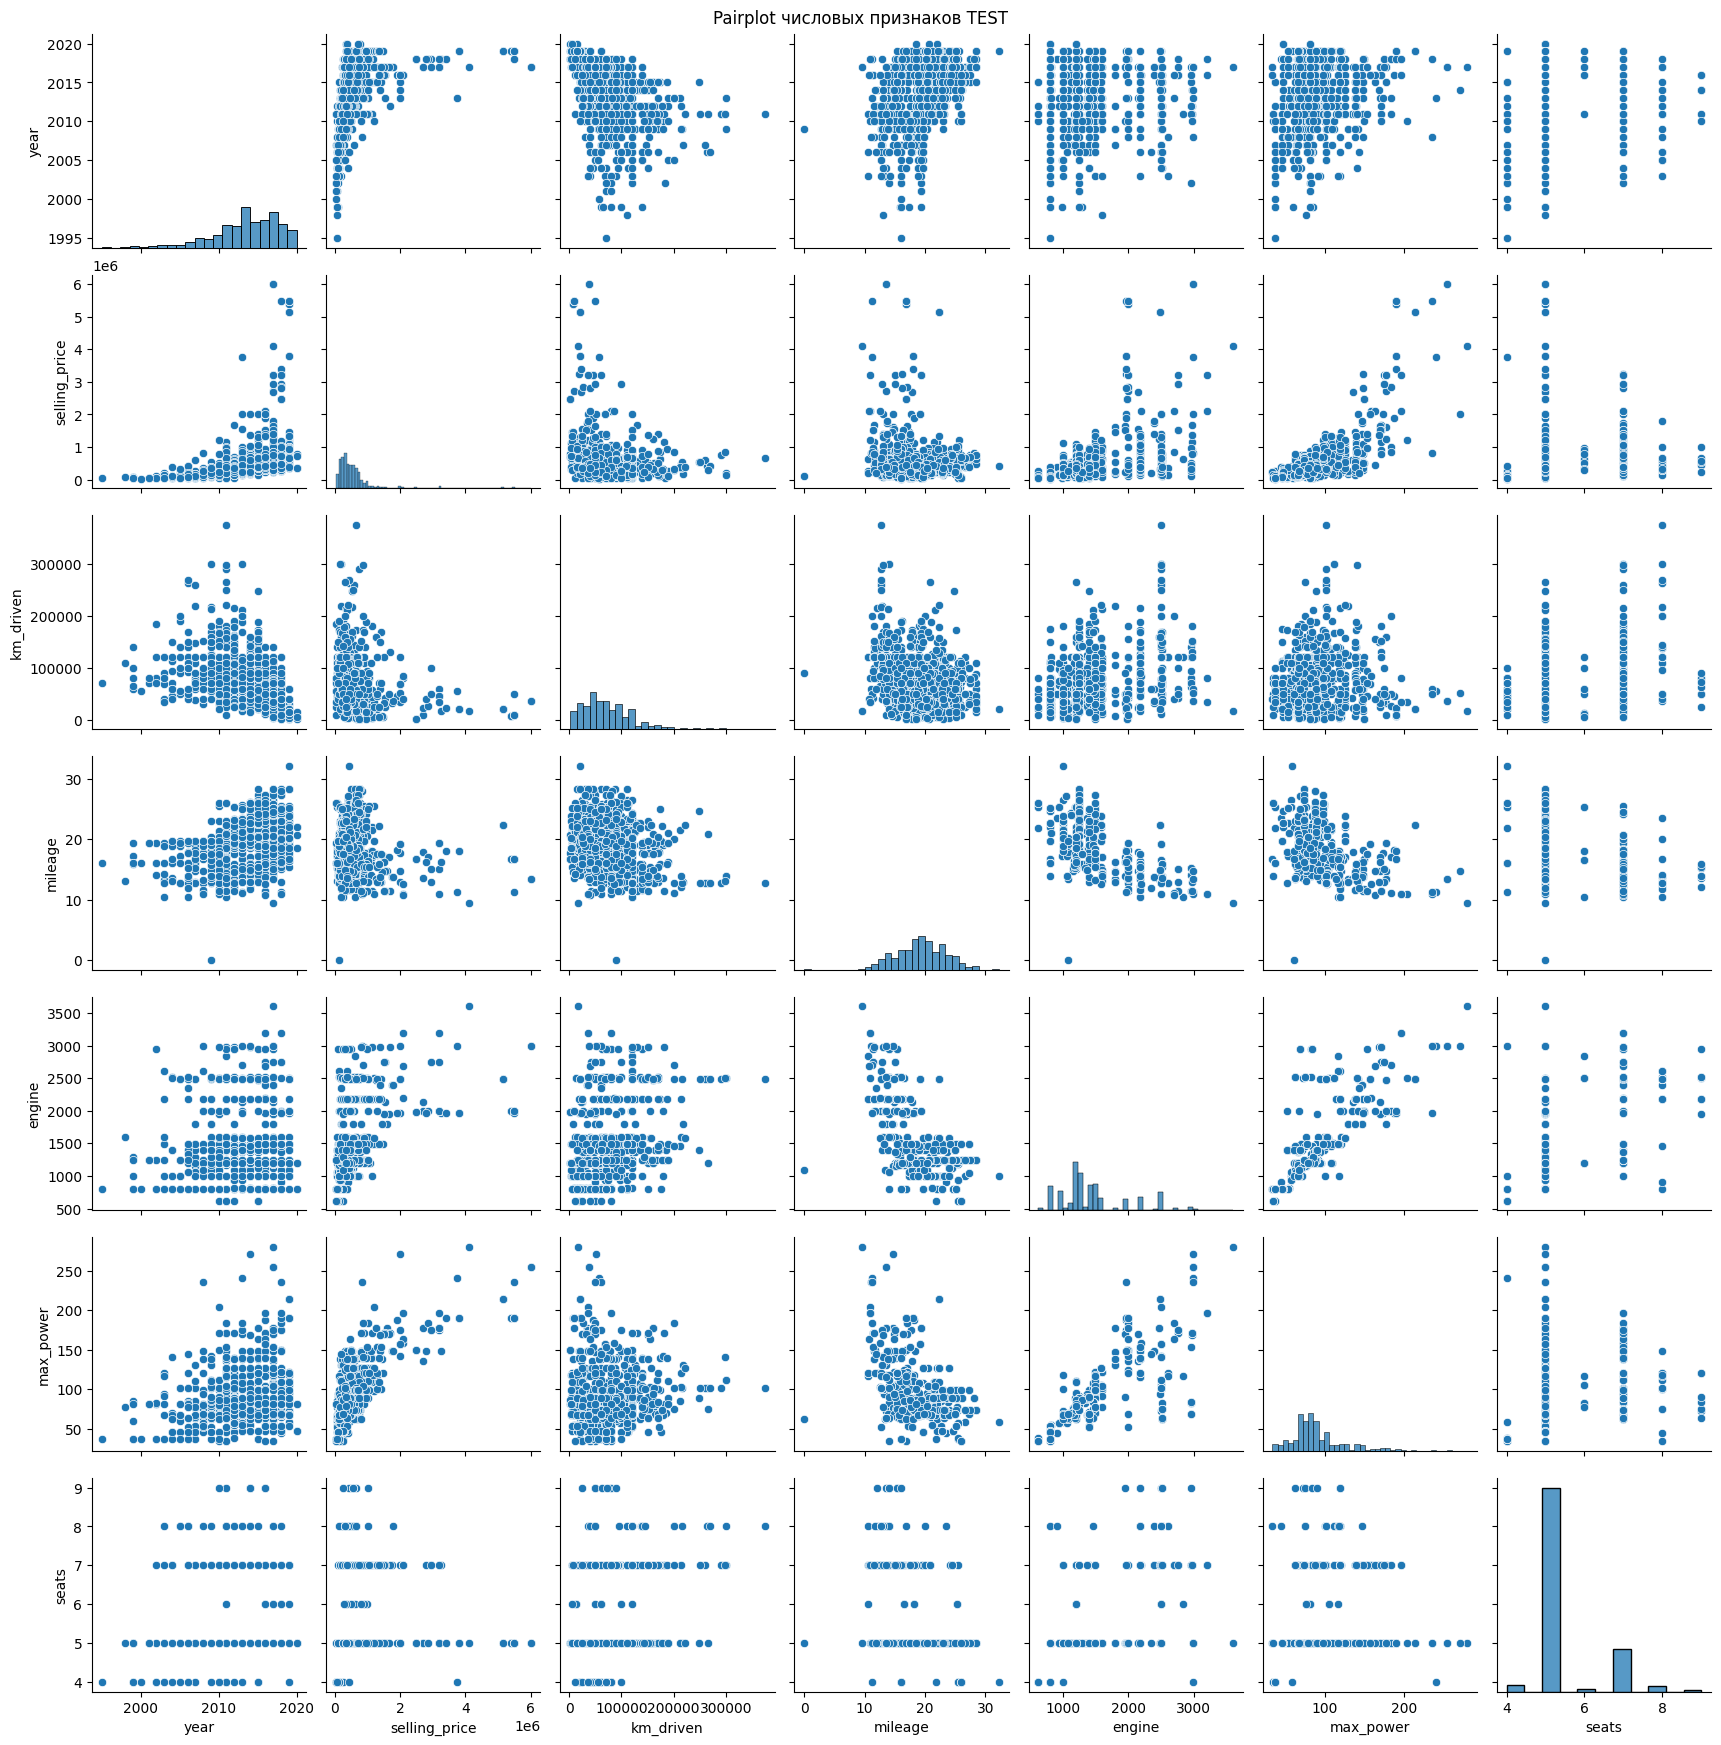

In [29]:
sns.pairplot(df_test[num_col])
plt.suptitle("Pairplot числовых признаков TEST", y=1)
plt.show()

`Your answer here`

Похожими ли оказались совокупности при разделении на трейн и тест?

Мне кажется, что распределения визуальны похожи, только видно, что года выпуска различаются, у треина больше до 90-х, а у теста посвежее

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [30]:
# Корреляция Пирсона
corr_matrix = df_train[num_col].corr()
print(corr_matrix)

                   year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000  


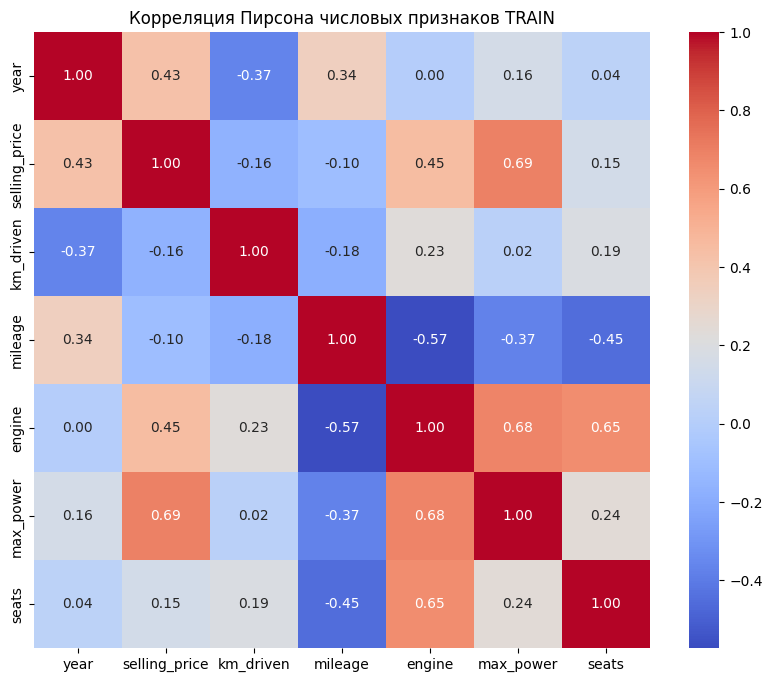

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Корреляция Пирсона числовых признаков TRAIN")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`

Два признака наименее коррелированы (близки по модулю к нулю): max_power и km_driven (0.02)

Сильная положиетльная лин зависимость: max_power и selling_price (0,69), чем больше мощность, тем больше цена, и наоборот, также у engine сразу с двумя переменными сильная связь: с max_power (0.68) и seats (0.65) - чем мощнее двигатель, тем больше мест и мощнее 

Точно нельзя утверждать, так как корреляция достаточно средняя, даже немножко ниже средней, но само высказывание верное, зависимость тут отрицательная, чем больше прокат машины, тем можно сделать предположение, что она более старая (ведь новые машины меньше проезжают)

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

мне нравятся график: ящик с усами (boxplot), мне кажется, он позволяет быстро оценить распределения переменных и найти выбросы, если они есть. Сделаю на тренировочных данных

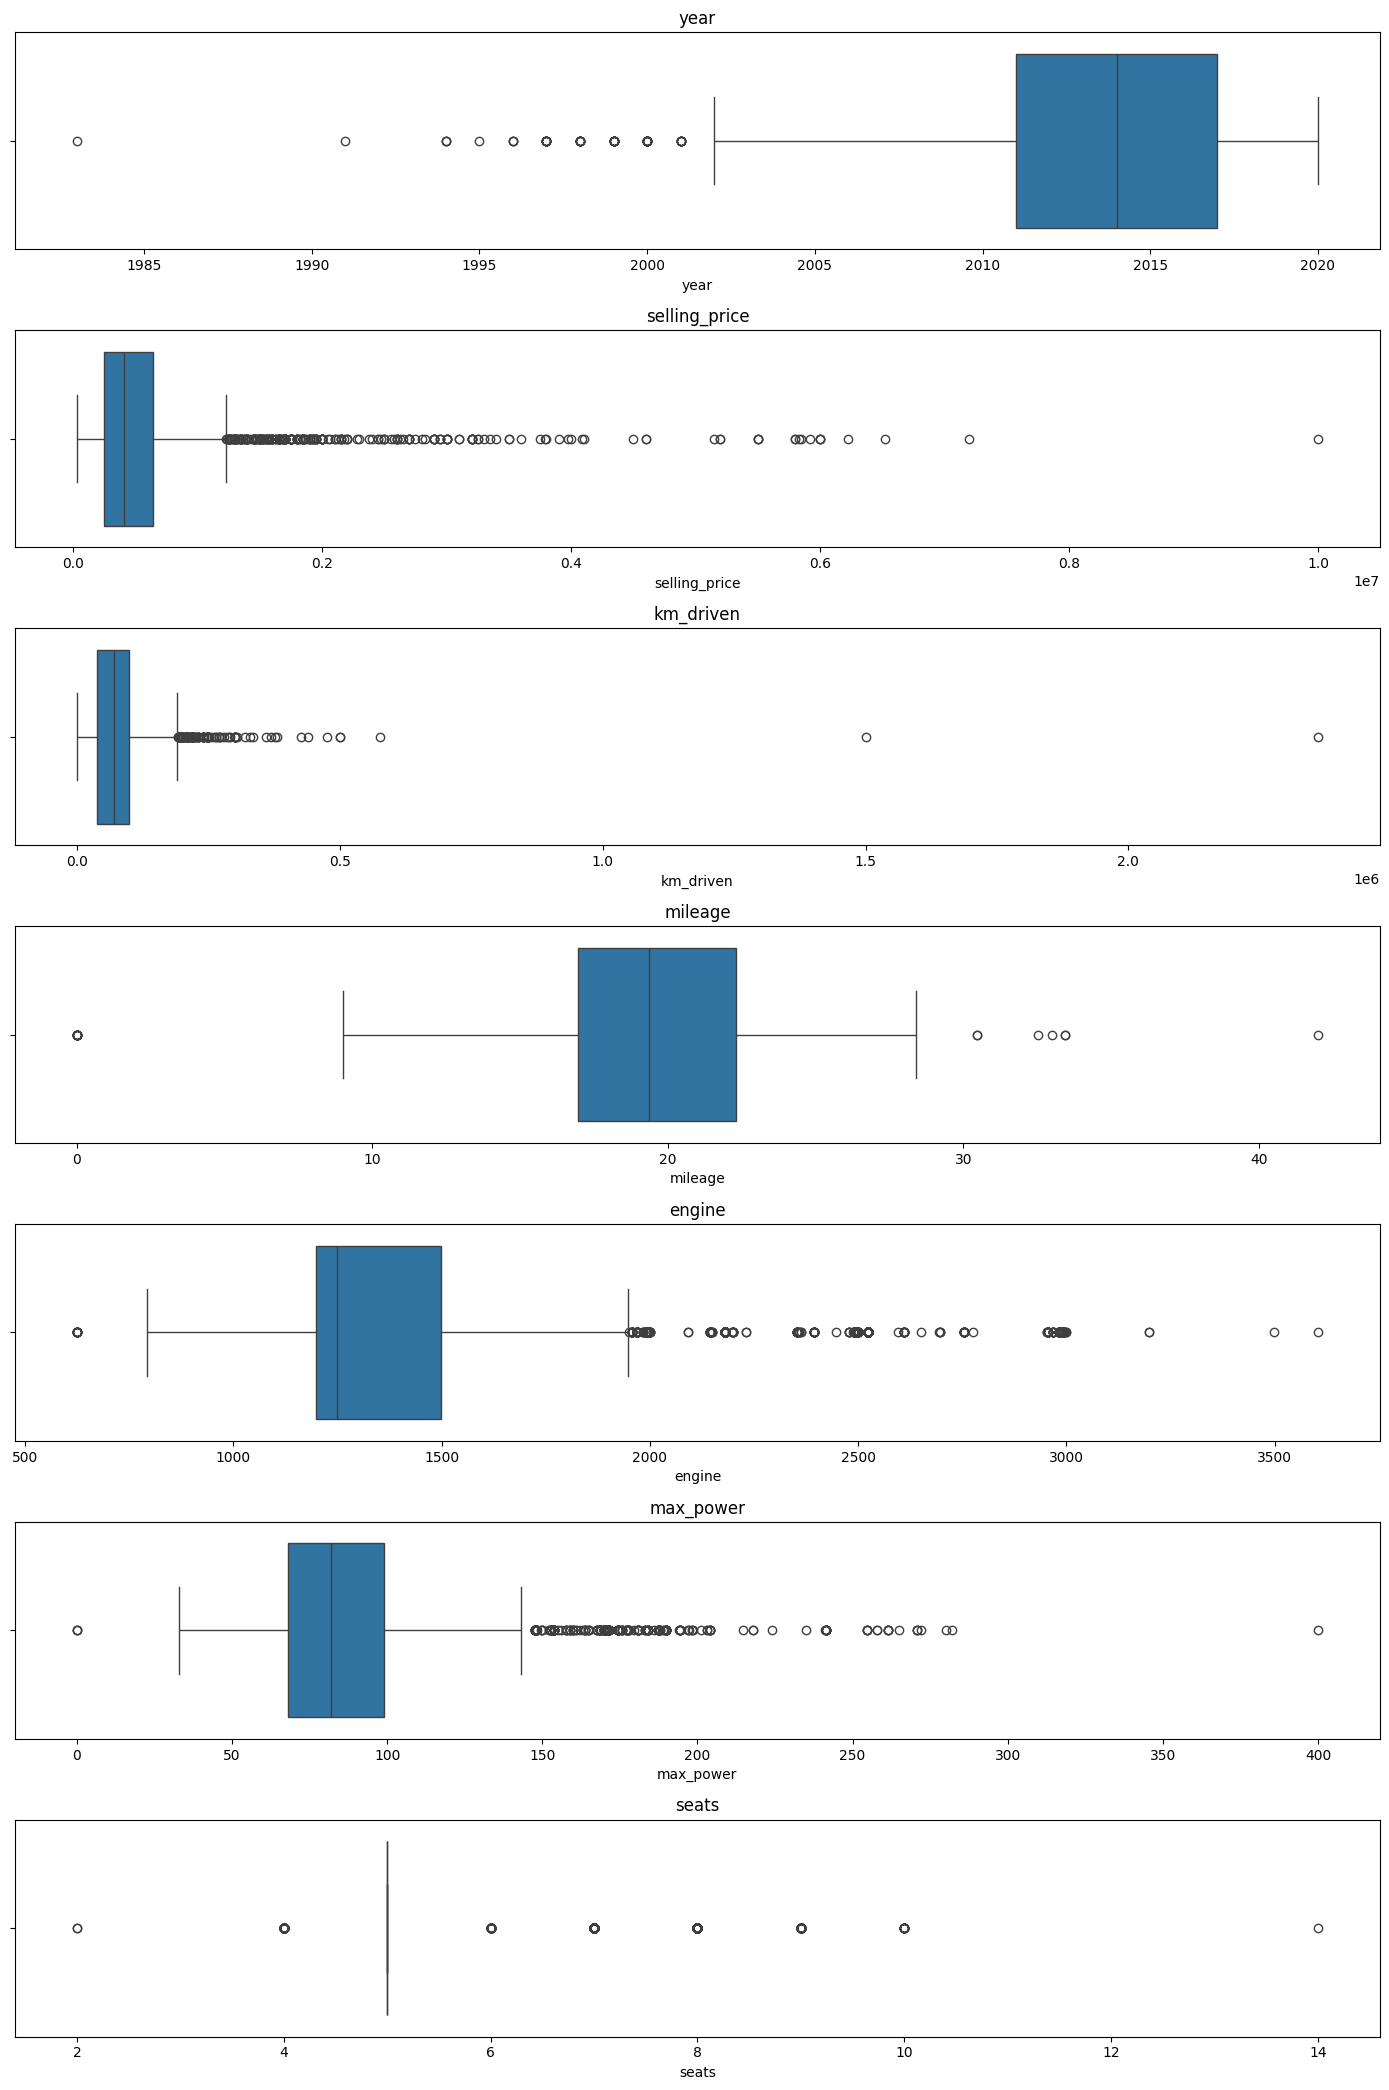

In [32]:
num_cols = df_train.select_dtypes(include='number').columns

plt.figure(figsize=(14, 3 * len(num_cols)))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Что можно отметить: 
- в колонке year медиана у нас примерно в 2014 году. Можно отметить, что машины раньше 2000 годов считаются выбросами, можно предположить, что большая часть машин в датасете от 2000 года
- в колонке seats у нас медиана - 5, остальные варианты реже встречаются 
- в колонке max_power медиана примерно 80, от 150 начинаются пределы межквартальног размаха, есть одно наблюдение, где около нуля значение, может быть ошибкой
- в колонке selling_price видно, что в среднем цена находится в одном диапазоне, но есть и дорогие и очень дорогие эксземляры
- также можно примерно описать и другие колонки, почти везде присутвтсвуют выбросы (которые за пределами межквартального размаха)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [33]:
#сделала копии и убрала категориальные признаки
df_train_num = df_train.copy()
df_test_num = df_test.copy()
cat_col = df_train.select_dtypes(include='object').columns
df_train_num=df_train_num.drop(columns=cat_col)
df_test_num=df_test_num.drop(columns=cat_col)


In [34]:
y_train = df_train_num['selling_price']
X_train = df_train_num.drop(columns='selling_price')

In [35]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


Опишите выбранные вещественные признаки: 
- year - год выпуска машины
- km_driven - сколько машина проехала км
- mileage - средний расход топлива (сколько км можно проехать на одном литре) 
- engine - двигатель, его объем
- max_power - максимальная мощность машины 
- seats - количество посадочных мест в авто

In [36]:
y_test = df_test_num['selling_price']
X_test = df_test_num.drop(columns='selling_price')

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_test_pred)

print("Результаты линейной регрессии:")
print(f"R² train: {r2_train:.4f}. MSE train: {mse_train:.2f}")
print(f"R² test: {r2_test:.4f}. MSE test: {mse_test:.2f}")

y_test_pred_1 = y_test_pred.copy()

Результаты линейной регрессии:
R² train: 0.5923. MSE train: 116874153930.03
R² test: 0.5941. MSE test: 233298779730.45


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [38]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)

y_train_pred = lr2.predict(X_train_scaled)
y_test_pred = lr2.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print('Результаты Standart Scaler:')
print(f"Train R2: {r2_train:.4f}. Train MSE: {mse_train:.4f}")
print(f"Test  R2: {r2_test:.4f}. Test  MSE: {mse_test:.4f}")

y_test_pred_2 = y_test_pred.copy()

Результаты Standart Scaler:
Train R2: 0.5923. Train MSE: 116874153930.0289
Test  R2: 0.5941. Test  MSE: 233298779730.4498


вообще ничего почему-то не изменилось

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [39]:
# your code here
coefs = lr2.coef_
col_names = X_train.columns
max_coef_idx = np.argmax(np.abs(coefs))
most_informative_feature = col_names[max_coef_idx]
max_coef_value = coefs[max_coef_idx]

print(f"Наиболее информативный (и важный) признак: {most_informative_feature} с коэффициентом {max_coef_value:.4f}")

Наиболее информативный (и важный) признак: max_power с коэффициентом 322807.3533


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [40]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso()  
lasso.fit(X_train_scaled, y_train)

y_pred_train = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_test_pred)

print('Результаты Lasso:')
print(f"Train R2: {r2_train:.4f}. Train MSE: {mse_train:.4f}")
print(f"Test  R2: {r2_test:.4f}. Test  MSE: {mse_test:.4f}")

y_test_pred_3 = y_test_pred.copy()

Результаты Lasso:
Train R2: 0.5923. Train MSE: 116874153940.1429
Test  R2: 0.5941. Test  MSE: 233299450599.1693


чего-то метрики не меняются...

In [41]:
# your code here
lasso_zeroed = (lasso.coef_ == 0)
coef_table = pd.DataFrame({
    "feature": X_train.columns,
    "coef": lasso.coef_,
    "zeroed": lasso_zeroed
})
coef_table

,feature,coef,zeroed
0,year,152772.390214,False
1,km_driven,-44157.689858,False
2,mileage,28832.043396,False
3,engine,61173.662409,False
4,max_power,322808.236919,False
5,seats,-23206.255649,False


Можно отметить, что ни один из переменных не занулила Лассо регрессия. Думаю, это может быть связано с тем, что у нас мало признаков и ,возможно, все признаки важны для предсказание целевой переменной

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [42]:
from sklearn.model_selection import GridSearchCV

# your code here
alpha_grid = np.logspace(-4, 2, 10)

param_grid = {"alpha": alpha_grid}

lasso2 = Lasso()

grid = GridSearchCV(
    lasso2,
    param_grid,
    cv=10,          
    scoring="neg_mean_squared_error"
)

grid.fit(X_train_scaled, y_train)
num_models_trained = len(param_grid['alpha']) * 10 #  число alpha * число фолдов 

print(f"Всего обучено моделей в GridSearch: {num_models_trained}")

best_alpha = grid.best_params_['alpha']
print(f"Лучший коэффициент регуляризации alpha: {best_alpha}")

best_model = grid.best_estimator_

num_zero_coef = sum(best_model.coef_ == 0)
print(f"Количество зануленных коэффициентов в лучшей модели: {num_zero_coef}")

best_model.fit(X_train_scaled, y_train)

y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print('\nРезультаты GridSearch')
print(f"R² train: {r2_train:.4f}. MSE train: {mse_train:.2f}")
print(f"R² test: {r2_test:.4f}. MSE test: {mse_test:.2f}")

y_test_pred_4 = y_test_pred.copy()

Всего обучено моделей в GridSearch: 100
Лучший коэффициент регуляризации alpha: 100.0
Количество зануленных коэффициентов в лучшей модели: 0

Результаты GridSearch
R² train: 0.5923. MSE train: 116874252567.18
R² test: 0.5940. MSE test: 233365851675.21


что-то вообще ничего не меняется в метриках..

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [43]:
from sklearn.linear_model import ElasticNet

# your code here
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

elastic_net = ElasticNet()

grid2 = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')
grid2.fit(X_train_scaled, y_train)

num_models_trained = len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10  # число alpha * число l1_ratio * число фолдов
print(f"Всего обучено моделей: {num_models_trained}")

best_params = grid2.best_params_
print(f"Оптимальные параметры: alpha = {best_params['alpha']}, l1_ratio = {best_params['l1_ratio']}")

best_alpha = best_params['alpha']
best_l1_ratio = best_params['l1_ratio']

y_train_pred = grid2.best_estimator_.predict(X_train_scaled)
y_test_pred = grid2.best_estimator_.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

print('\nРезультаты ElasticNet')
print(f"R² train: {r2_train:.4f}. MSE train: {mse_train:.2f}")
print(f"R² test: {r2_test:.4f}. MSE test: {mse_test:.2f}")

y_test_pred_5 = y_test_pred.copy()

Всего обучено моделей: 250
Оптимальные параметры: alpha = 0.1, l1_ratio = 0.9

Результаты ElasticNet
R² train: 0.5922. MSE train: 116889619199.95
R² test: 0.5919. MSE test: 234562589441.86


все такие же метрики

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [44]:
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_test_cat = df_test.drop(columns=['name', 'selling_price'])

Запуталась тут в таблицах, я вернулась к изначальной и убрала оттуда таргет и name, потому что иначе я не знаю, откуда взять 10 стообцов. 

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [45]:
assert X_train_cat.shape == (5840, 10)

In [46]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [47]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

cat_cols_s = X_train_cat.select_dtypes(object).columns.tolist() + ['seats']

ohe = OneHotEncoder(drop='first', sparse_output=False) #дропаем один столбец, чтобы не было мультиколлениарности 

X_train_cat_encoded = ohe.fit_transform(X_train_cat[cat_cols_s])
X_test_cat_encoded = ohe.transform(X_test_cat[cat_cols_s])

cat_feature_names = ohe.get_feature_names_out(cat_cols_s)
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=cat_feature_names, index=X_train_cat.index)
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=cat_feature_names, index=X_test_cat.index)

num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
X_train_encoded = pd.concat([X_train_cat[num_cols],X_train_cat_encoded.reset_index(drop=True)], axis=1)
X_test_encoded = pd.concat([X_test_cat[num_cols],X_test_cat_encoded.reset_index(drop=True)], axis=1)

print(X_train_encoded.head())
print(X_test_encoded.head())

   year  km_driven  mileage  engine  max_power  fuel_Diesel  fuel_LPG  \
0  2014     145500    23.40    1248      74.00          1.0       0.0   
1  2014     120000    21.14    1498     103.52          1.0       0.0   
2  2010     127000    23.00    1396      90.00          1.0       0.0   
3  2007     120000    16.10    1298      88.20          0.0       0.0   
4  2017      45000    20.14    1197      81.86          0.0       0.0   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  ...  \
0          0.0                     1.0                           0.0  ...   
1          0.0                     1.0                           0.0  ...   
2          0.0                     1.0                           0.0  ...   
3          1.0                     1.0                           0.0  ...   
4          1.0                     1.0                           0.0  ...   

   owner_Test Drive Car  owner_Third Owner  seats_4  seats_5  seats_6  \
0                   0.0  

По принту и коду видно, что сделала n-1 категорий, чтобы не было лин зависимости

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
alpha_grid = np.logspace(-4, 2, 10)
param_grid = {'alpha': alpha_grid}

ridge = Ridge()
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1
)
grid_ridge.fit(X_train_encoded, y_train)

best_ridge = grid_ridge.best_estimator_
best_alpha = grid_ridge.best_params_['alpha']

print("Лучший alpha:", best_alpha)

y_train_pred = best_ridge.predict(X_train_encoded)
y_test_pred = best_ridge.predict(X_test_encoded)

r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)
 
print('Результаты OHE:')
print(f"R² train: {r2_train:.4f}. MSE train: {mse_train:.2f}")
print(f"R² test: {r2_test:.4f}. MSE test: {mse_test:.2f}")

y_test_pred_6 = y_test_pred.copy()


/opt/anaconda3/envs/streamlit310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.34752e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/streamlit310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.05758e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/envs/streamlit310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.08962e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Лучший alpha: 4.641588833612772
Результаты OHE:
R² train: 0.6597. MSE train: 97550762428.83
R² test: 0.6428. MSE test: 205309088375.07


Можно отметить, что благодаря кодированию кат признаков метрики стали лучше: R2 выше, а MSE ниже!

всего строилось 100 моделей: 10 (альфа) * 10 фолдов 


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [49]:
def business_metric(y_true, y_pred):
    diff_ratio = abs(y_pred - y_true) / y_true
    return (diff_ratio <= 0.1).mean()

for ind, elem in enumerate([y_test_pred_1, y_test_pred_2, y_test_pred_3, y_test_pred_4, y_test_pred_5, y_test_pred_6]):
  print(f'Модель {ind+1} имеет долю {business_metric(y_test, elem)}')

Модель 1 имеет долю 0.227
Модель 2 имеет долю 0.227
Модель 3 имеет долю 0.227
Модель 4 имеет долю 0.226
Модель 5 имеет долю 0.225
Модель 6 имеет долю 0.247


`Your answer here`

Как можно заметить, самая лучшепредсказывающая модель - 6, то есть когда мы закодировали категориальные признаки!

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Взяла обучение для шестой модели

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

   В приложении должно быть:

   * отображение ключевых графиков EDA;
   * ввод данных (CSV или ручной ввод);
   * применение модели;
   * визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.